In [1]:
# tables
import pandas as pd
import numpy as np
# graphics
import seaborn as sns
import matplotlib.pyplot as plt
# text processing
import nltk
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
# expressions
import re
# machine learning
from sklearn.model_selection import train_test_split
# Deal with html text
from bs4 import BeautifulSoup
# Multiprocessing
import multiprocessing
from joblib import Parallel, delayed
from tqdm import tqdm

## Installation des packages 

In [2]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/boleynkenkem/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/boleynkenkem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/boleynkenkem/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [3]:
import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/boleynkenkem/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
debug = False

Plus on a des données d'entrées mieux c'est. Nous avons effectué 10  requêtes SQL afin d'avoir 10 fichiers csv: QueryResults.csv, QueryResults(1).csv à QueryResults(9).csv. Ces fichiers ont été générés en respectant la consignes qui demandait de faire des requêtes avec des contraintes sur les id.  Nos requêtes SQL ont été effectué sur les id compris entre 0 et 50 000. Chaque requête a pris les résultats non nuls dans une plage de 100 000 valeurs. Il y a eu différentes requêtes afin d'avoir des fichiers d'une taille inférieure à 25Mb.

Nous dump sql se trouve dans le fichier sql_requery.txt

## Chargement des données 

### Concaténations de tous les inputs 

In [4]:
df_main = pd.DataFrame(columns=["Id", "Title", "Body", "Tags"])

In [5]:
df_main = df_main.append(pd.read_csv("input/QueryResults.csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(1).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(2).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(3).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(4).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(5).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(6).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(7).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(8).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(9).csv"), ignore_index = True)

Nous pouvons afficher les colonnes pour voir.

In [6]:
df_main.columns

Index(['Id', 'Title', 'Body', 'Tags'], dtype='object')

### informations générales sur la table principale

In [7]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73942 entries, 0 to 73941
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      73942 non-null  object
 1   Title   73942 non-null  object
 2   Body    73942 non-null  object
 3   Tags    73942 non-null  object
dtypes: object(4)
memory usage: 2.3+ MB


In [8]:
df_main

,Id,Title,Body,Tags
0,4,How to convert decimal to double in C#?,<p>I want to use a <code>Track-Bar</code> to c...,<c#><floating-point><type-conversion><double><...
1,6,Percentage width child element in absolutely p...,<p>I have an absolutely positioned <code>div</...,<html><css><internet-explorer-7>
2,9,"In C#, how do I calculate someone's age based ...",<p>Given a <code>DateTime</code> representing ...,<c#><.net><datetime>
3,11,Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,<c#><datetime><time><datediff><relative-time-s...
4,13,Determine a user's timezone,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...
...,...,...,...,...
73937,499977,How to code hosting of the WF with WC 3.5 Reci...,<p>I created a small VS solution that includes...,<windows><wcf><service><hosting><workflow-foun...
73938,499987,How to access information entered during setup...,<p>I added a simple dialog window to the insta...,<.net><visual-studio><installation><windows-in...
73939,499989,Mysql MediumText causes PHP Fatal error: Allow...,<p>I have my own php data object class that wr...,<php><memory-management>
73940,499995,How do you validate a binary search tree?,<p>I read on here of an exercise in interviews...,<algorithm><data-structures><binary-search-tree>


## Inspection générale des données 

### Title feature

In [9]:
for i in range(10):
    print(df_main.loc[i, "Title"])

How to convert decimal to double in C#?
Percentage width child element in absolutely positioned parent on Internet Explorer 7
In C#, how do I calculate someone's age based on a DateTime type birthday?
Calculate relative time in C#
Determine a user's timezone
Difference between Math.Floor() and Math.Truncate()
Filling a DataSet or DataTable from a LINQ query result set
Binary Data in MySQL
What is the fastest way to get the value of π?
Throw an error in a MySQL trigger


Nous pouvons essayer de compter le nombre de mots dans la "feature" Title. 

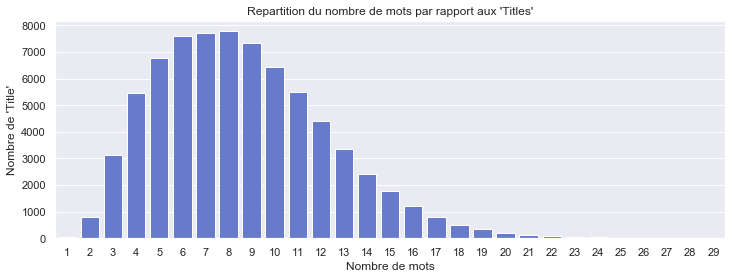

In [10]:
sns.set()
colors = sns.color_palette("hls", 8)
plt.figure(figsize=(12,4))
sns.countplot(df_main["Title"].map(lambda field:len(field.split(' '))).values, color=colors[5])
plt.title("Repartition du nombre de mots par rapport aux 'Titles'")
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de 'Title'")
plt.show()

Essayons d'afficher les valeurs uniques avec leur proportion numériques afin davoir les informations sur le nombre de mots à valeurs faibles. 

In [11]:
unique, values = np.unique(df_main["Title"].map(lambda field:len(field.split(' '))).values, return_counts=True)
pd.DataFrame({'unique':unique, 'count':values}).loc[20:]

,unique,count
20,21,129
21,22,86
22,23,55
23,24,31
24,25,25
25,26,13
26,27,9
27,28,4
28,29,3


Regardons les mots les plus fréquents. Il est toujours intéressant de regarder les mots les plus fréquents avant de faire du clean.

In [12]:
df_main.loc[0:20, "Title"].values

array(['How to convert decimal to double in C#?',
       'Percentage width child element in absolutely positioned parent on Internet Explorer 7',
       "In C#, how do I calculate someone's age based on a DateTime type birthday?",
       'Calculate relative time in C#', "Determine a user's timezone",
       'Difference between Math.Floor() and Math.Truncate()',
       'Filling a DataSet or DataTable from a LINQ query result set',
       'Binary Data in MySQL',
       'What is the fastest way to get the value of π?',
       'Throw an error in a MySQL trigger',
       'How to use the C socket API in C++ on z/OS',
       'Unloading a ByteArray using Actionscript 3',
       'Check for changes to an SQL Server table?',
       'Reliable timer in a console application',
       'Best way to allow plugins for a PHP application',
       'Multiple submit buttons in an HTML form',
       'How do I get a distinct, ordered list of names from a DataTable using LINQ?',
       'Microsoft Office 2007 fi

Nous devons supprimer les caractères spéciaux et les ponctuations. Nous alons écrire une fonction qui prend en entrée un text, supprimer les caractères spéciaux, les ponctuations et enleve les majuscules. 

In [13]:
def pre_tokenize(text):
    
    # Suppression des points
    text = text.replace('.', ' ')
    # Suppressions des ponctuations
    expr = ["\n"] #["?", ",", ".", "'", ";", ":", "!", "\n", "(", ")", "|", "_", "-", "`", "+", "-", "*", "/"]
    for char in expr:
        text = text.replace(char, ' ')
    # Miniscule
    text = str(np.char.lower(text))
    
    return text

In [14]:
df_main["Title"] = df_main["Title"].map(pre_tokenize)

In [15]:
df_main.loc[0:20, "Title"].values

array(['how to convert decimal to double in c#?',
       'percentage width child element in absolutely positioned parent on internet explorer 7',
       "in c#, how do i calculate someone's age based on a datetime type birthday?",
       'calculate relative time in c#', "determine a user's timezone",
       'difference between math floor() and math truncate()',
       'filling a dataset or datatable from a linq query result set',
       'binary data in mysql',
       'what is the fastest way to get the value of π?',
       'throw an error in a mysql trigger',
       'how to use the c socket api in c++ on z/os',
       'unloading a bytearray using actionscript 3',
       'check for changes to an sql server table?',
       'reliable timer in a console application',
       'best way to allow plugins for a php application',
       'multiple submit buttons in an html form',
       'how do i get a distinct, ordered list of names from a datatable using linq?',
       'microsoft office 2007 fi

Nous allons aplliquer la Lemmatization afin de donner aux mots de notre texte une forme neutre. Nous le faisons dans la fonction suivantes. 

In [16]:
def lemmatize_text(text):

    lem = WordNetLemmatizer()
    text_lemmatized = []
    words = word_tokenize(text)
    for word in words:
        word = lem.lemmatize(word, "v")
        text_lemmatized.append(word)
    text = ' '.join(text_lemmatized)
    
    return text

In [17]:
df_main["Title"] = df_main["Title"].map(lemmatize_text)

In [18]:
df_main.loc[0:20, "Title"].values

array(['how to convert decimal to double in c # ?',
       'percentage width child element in absolutely position parent on internet explorer 7',
       "in c # , how do i calculate someone 's age base on a datetime type birthday ?",
       'calculate relative time in c #', "determine a user 's timezone",
       'difference between math floor ( ) and math truncate ( )',
       'fill a dataset or datatable from a linq query result set',
       'binary data in mysql',
       'what be the fastest way to get the value of π ?',
       'throw an error in a mysql trigger',
       'how to use the c socket api in c++ on z/os',
       'unload a bytearray use actionscript 3',
       'check for change to an sql server table ?',
       'reliable timer in a console application',
       'best way to allow plugins for a php application',
       'multiple submit button in an html form',
       'how do i get a distinct , order list of name from a datatable use linq ?',
       'microsoft office 2007 file

In [19]:
df_main["Title_tokens"] = df_main["Title"].map(word_tokenize)

In [20]:
df_main.loc[0:20, "Title_tokens"].values

array([list(['how', 'to', 'convert', 'decimal', 'to', 'double', 'in', 'c', '#', '?']),
       list(['percentage', 'width', 'child', 'element', 'in', 'absolutely', 'position', 'parent', 'on', 'internet', 'explorer', '7']),
       list(['in', 'c', '#', ',', 'how', 'do', 'i', 'calculate', 'someone', "'s", 'age', 'base', 'on', 'a', 'datetime', 'type', 'birthday', '?']),
       list(['calculate', 'relative', 'time', 'in', 'c', '#']),
       list(['determine', 'a', 'user', "'s", 'timezone']),
       list(['difference', 'between', 'math', 'floor', '(', ')', 'and', 'math', 'truncate', '(', ')']),
       list(['fill', 'a', 'dataset', 'or', 'datatable', 'from', 'a', 'linq', 'query', 'result', 'set']),
       list(['binary', 'data', 'in', 'mysql']),
       list(['what', 'be', 'the', 'fastest', 'way', 'to', 'get', 'the', 'value', 'of', 'π', '?']),
       list(['throw', 'an', 'error', 'in', 'a', 'mysql', 'trigger']),
       list(['how', 'to', 'use', 'the', 'c', 'socket', 'api', 'in', 'c++', 'on', '

On est confronté à un problème, le 'word_tokenize' sépare les caractères comme «#» de «c#». Si "C#" est utilisé deux fois, le modèle trouvera deux mots identiques au lieu d'un. Additionnons tous les mots pour compter les fréquences. 

In [21]:
np_text = df_main["Title_tokens"].values.copy()
full_title_text_splitted = []
for i in range(len(np_text)):
    full_title_text_splitted.extend(np_text[i])
del np_text

In [22]:
full_title_text_splitted[0:20]

['how',
 'to',
 'convert',
 'decimal',
 'to',
 'double',
 'in',
 'c',
 '#',
 '?',
 'percentage',
 'width',
 'child',
 'element',
 'in',
 'absolutely',
 'position',
 'parent',
 'on',
 'internet']

Nous pouvons maintenant voir le nombre de mots uniques. 

In [23]:
unique, count = np.unique(full_title_text_splitted, return_counts=True)

In [24]:
len(unique)

25842

Regardons une partie de nos données. 

In [25]:
np.concatenate((unique[0:100], unique[-100:]))

array(['!', '#', '$', '%', '&', "'", "''", "'*", "'***", "'+new", "'-",
       "'-lmcheck", "'-re", "'/", "'//", "'/dnntest", "'/forum/default",
       "'/reports", "'/subversion/main/db/transactions/0-1", "'0110",
       "'07", "'08", "'09", "'1033", "'20", "'20050411", "'20060201",
       "'397", "'404", "'77", "'90", "'91", "'95", "'=", "'==", "'\\",
       "'\\0", "'\\\\", "'\\n", "'^", "'^m", "'__cdecl", "'__progname",
       "'absolute", "'accept", "'access", "'accessdeniedexception",
       "'action_name", "'actions", "'add", "'administrator", "'advanced",
       "'ajaxcontroltoolkit", "'allow_url_fopen", "'an", "'analysis",
       "'anonymous", "'ansi", "'anti", "'any", "'app_web_hamznvwf",
       "'app_web_kh7-x3ka", "'application/javascript", "'argument", "'as",
       "'ascii", "'asp", "'astoria", "'atomic", "'attempt",
       "'atttributes", "'audience", "'author", "'autotest", "'back",
       "'bad", "'beforesubmit", "'best", "'binary", "'bind", "'bit",
       "'bits", "'b

Nous pouvons voir qu'il y'a beaucoup de mots qui peuvent être des nombres, ou des mots qui ont quelques quelques caractères spéciaux, d'autres écrits deux fois. Regardons la répartition.

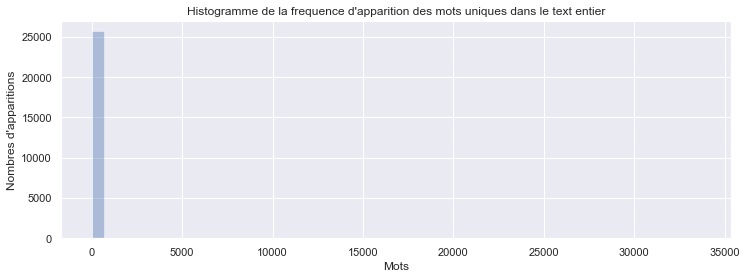

In [26]:
sns.set()
plt.figure(figsize=(12,4))
sns.distplot(count, kde=False)
plt.title("Histogramme de la frequence d'apparition des mots uniques dans le text entier")
plt.xlabel("Mots")
plt.ylabel("Nombres d'apparitions")
plt.show()

La plupart de la distribution semble proche de 1. Regardons et comptons le nombre de mots apparaissant plus de 1000 fois.

In [27]:
count[np.where(count > 1000)]

array([ 3396,  1121,  2451,  5177,  5173,  4479,  2964,  4487, 33671,
        5269, 23830,  1302,  1067,  5278,  6986,  1008,  2054,  1248,
        3221, 12452,  2939,  1063,  1042,  3730,  1591,  1040,  4981,
        1223,  1674,  1879,  1686,  1778,  1907,  1487, 10037,  1199,
        4373,  1299,  8541,  1112,  5334,  1302,  2827,  1406, 16467,
        1034,  9045,  1149, 21026,  1091,  2093,  2550,  1585,  1268,
        1199,  1115,  1052,  1518,  1112,  1057,  6331,  2305,  1765,
        8276,  4979,  2711,  1321,  1640,  1131,  1453,  1046,  1090,
        2664,  1270,  1332,  1085,  3150,  1665,  1318,  1399,  1365,
        1666, 13432,  2190, 23393,  1212,  7714,  1020,  1395,  1437,
        1157,  3098,  2094,  5927,  2535,  1817,  2227,  6470,  1270,
        1064,  3262])

In [28]:
len(np.where(count > 1000)[0])

101

Nombre d'occurence des mots qui apparaissent le plus

In [29]:
max(count)

33671

In [30]:
unique[np.argmax(count)]

'?'

Affichons de manière plus détaillé l'histogramme. 

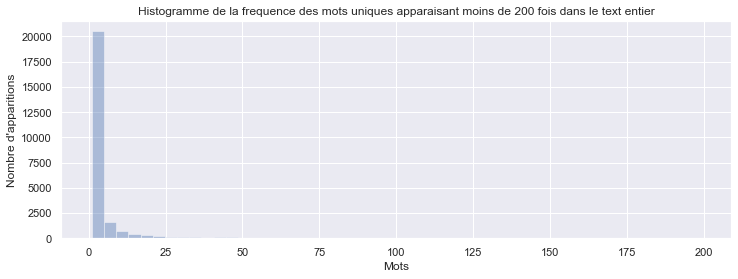

In [31]:
sns.set()
plt.figure(figsize=(12,4))
sns.distplot(count[np.where(count < 200)], kde=False)
plt.title("Histogramme de la frequence des mots uniques apparaisant moins de 200 fois dans le text entier")
plt.xlabel("Mots")
plt.ylabel("Nombre d'apparitions")
plt.show()

In [32]:
len(np.where(count == 1)[0])

15483

Le nombre de mots avec une seule occurrence est énorme. Ces mots donnent trop peu d'informations et prennent trop de place mémoire. Il pourrait être intéressant d'essayer de les supprimer dans notre modélsation. Ou du moins, supprimez tous ceux qui ne sont pas dans le ditionnaire ( parce que peu de chances d'être réutilisé ...). Un nettoyage poussé peut être une solution, en supprimant, des chiffres, des caractères spéciaux ... On les garde pour l'instant.

In [33]:
title_words_to_del = unique[np.where(count == 1)]
title_words_to_del

array(["''", "'***", "'+new", ..., '⨝', '首', '？'], dtype='<U50')

In [34]:
del full_title_text_splitted

### Tags feature

In [35]:
for i in range(10):
    print(df_main.loc[i, "Tags"])

<c#><floating-point><type-conversion><double><decimal>
<html><css><internet-explorer-7>
<c#><.net><datetime>
<c#><datetime><time><datediff><relative-time-span>
<html><browser><timezone><user-agent><timezone-offset>
<.net><math>
<c#><linq><web-services><.net-3.5>
<mysql><database><binary-data><data-storage>
<performance><algorithm><language-agnostic><unix><pi>
<mysql><database><triggers>


Séparons les tags dans une liste pour mieux analyser.

In [36]:
df_main["Tags"] = df_main["Tags"].map(lambda field:field[1:-1].split('><'))

In [37]:
for i in range(10):
    print(df_main.loc[i, "Tags"])

['c#', 'floating-point', 'type-conversion', 'double', 'decimal']
['html', 'css', 'internet-explorer-7']
['c#', '.net', 'datetime']
['c#', 'datetime', 'time', 'datediff', 'relative-time-span']
['html', 'browser', 'timezone', 'user-agent', 'timezone-offset']
['.net', 'math']
['c#', 'linq', 'web-services', '.net-3.5']
['mysql', 'database', 'binary-data', 'data-storage']
['performance', 'algorithm', 'language-agnostic', 'unix', 'pi']
['mysql', 'database', 'triggers']


On peut ajouter, du moins temporairement un champ dans le DataFrame principale. C'est le nombre de tags par posts. Il pourrait être utilisé pour obtenir une distribution.

In [38]:
df_main["nb_tags"] = df_main["Tags"].map(lambda field:len(field))

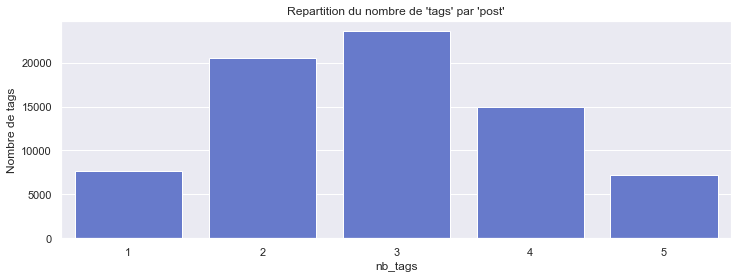

In [39]:
sns.set()
colors = sns.color_palette("hls", 8)
plt.figure(figsize=(12,4))
sns.countplot(df_main["nb_tags"], color=colors[5])
plt.title("Repartition du nombre de 'tags' par 'post'")
plt.ylabel("Nombre de tags")
plt.show()

In [40]:
np.unique(df_main["nb_tags"], return_counts=True)

(array([1, 2, 3, 4, 5]), array([ 7701, 20573, 23579, 14917,  7172]))

Les valeurs uniques et leurs proportions numériques donnent des informations sur les articles avec 5 tags. Nous pouvons maintenant lister toutes les tags et voir les fréquentes

In [41]:
np_text = df_main["Tags"].values.copy()
full_text_tags_splitted = []
for i in range(len(np_text)):
    full_text_tags_splitted.extend(np_text[i])
full_text_tags_splitted[0:20]
del np_text

In [42]:
full_text_tags_splitted[0:20]

['c#',
 'floating-point',
 'type-conversion',
 'double',
 'decimal',
 'html',
 'css',
 'internet-explorer-7',
 'c#',
 '.net',
 'datetime',
 'c#',
 'datetime',
 'time',
 'datediff',
 'relative-time-span',
 'html',
 'browser',
 'timezone',
 'user-agent']

In [43]:
unique, count = np.unique(full_text_tags_splitted, return_counts=True)

In [44]:
print("Nombre de tags: {}".format(len(full_text_tags_splitted)))
print("Nombre de tags uniques: {}".format(len(unique)))

Nombre de tags: 215112
Nombre de tags uniques: 10921


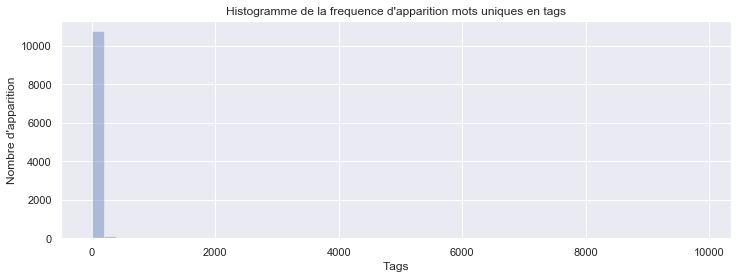

In [45]:
sns.set()
plt.figure(figsize=(12,4))
sns.distplot(count, kde=False)
plt.title("Histogramme de la frequence d'apparition mots uniques en tags")
plt.xlabel("Tags")
plt.ylabel("Nombre d'apparition")
plt.show()

Comme précedemment avec les 'Title', la plupart des tags n'apparaissent qu'une seule fois dont le max est:

In [46]:
unique[np.argmax(count)]

'c#'

Le nombre de tags apparaissant plus de 200 fois. 

In [47]:
len(np.where(count > 200)[0])

167

In [48]:
len(np.where(count == 1)[0])

4355

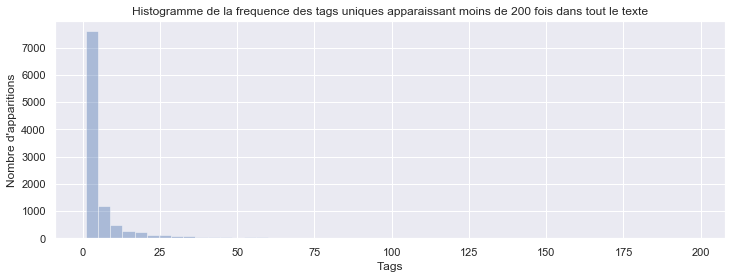

In [49]:
sns.set()
plt.figure(figsize=(12,4))
sns.distplot(count[np.where(count < 200)], kde=False)
plt.title("Histogramme de la frequence des tags uniques apparaissant moins de 200 fois dans tout le texte")
plt.xlabel("Tags")
plt.ylabel("Nombre d'apparitions")
plt.show()

In [50]:
del full_text_tags_splitted

## Body feature 

In [51]:
df_main.loc[0:3, "Body"].values

array(['<p>I want to use a <code>Track-Bar</code> to change a <code>Form</code>\'s opacity.</p>\n<p>This is my code:</p>\n<pre class="lang-cs prettyprint-override"><code>decimal trans = trackBar1.Value / 5000;\nthis.Opacity = trans;\n</code></pre>\n<p>When I build the application, it gives the following error:</p>\n<blockquote>\n<p>Cannot implicitly convert type <code>decimal</code> to <code>double</code></p>\n</blockquote>\n<p>I have tried using <code>trans</code> and <code>double</code> but then the <code>Control</code> doesn\'t work. This code worked fine in a past VB.NET project.</p>\n',
       "<p>I have an absolutely positioned <code>div</code> containing several children, one of which is a relatively positioned <code>div</code>. When I use a <code>percentage-based width</code> on the child <code>div</code>, it collapses to <code>0 width</code> on IE7, but not on Firefox or Safari.</p>\n\n<p>If I use <code>pixel width</code>, it works. If the parent is relatively positioned, the 

Gestion de la Majuscule et des points...

In [52]:
df_main["Body"] = df_main["Body"].map(pre_tokenize)

In [53]:
df_main.loc[0:3, "Body"].values

array(['<p>i want to use a <code>track-bar</code> to change a <code>form</code>\'s opacity </p> <p>this is my code:</p> <pre class="lang-cs prettyprint-override"><code>decimal trans = trackbar1 value / 5000; this opacity = trans; </code></pre> <p>when i build the application, it gives the following error:</p> <blockquote> <p>cannot implicitly convert type <code>decimal</code> to <code>double</code></p> </blockquote> <p>i have tried using <code>trans</code> and <code>double</code> but then the <code>control</code> doesn\'t work  this code worked fine in a past vb net project </p> ',
       "<p>i have an absolutely positioned <code>div</code> containing several children, one of which is a relatively positioned <code>div</code>  when i use a <code>percentage-based width</code> on the child <code>div</code>, it collapses to <code>0 width</code> on ie7, but not on firefox or safari </p>  <p>if i use <code>pixel width</code>, it works  if the parent is relatively positioned, the percentage w

Nous utilisons BeautifulSoup pour supprimer les tags html.

In [54]:
def get_soup(text):
    """ Retourne un texte , un soup sans tags html"""
    
    soup = BeautifulSoup(text, 'html.parser')
    return soup

In [55]:
df_main["Body_soup"] = df_main["Body"].map(lambda x: get_soup(x).get_text())

In [56]:
df_main.loc[0:3, "Body_soup"].values

array(["i want to use a track-bar to change a form's opacity  this is my code: decimal trans = trackbar1 value / 5000; this opacity = trans;  when i build the application, it gives the following error:  cannot implicitly convert type decimal to double  i have tried using trans and double but then the control doesn't work  this code worked fine in a past vb net project  ",
       "i have an absolutely positioned div containing several children, one of which is a relatively positioned div  when i use a percentage-based width on the child div, it collapses to 0 width on ie7, but not on firefox or safari  if i use pixel width, it works  if the parent is relatively positioned, the percentage width on the child works   is there something i'm missing here? is there an easy fix for this besides the pixel-based width on the child? is there an area of the css specification that covers this?  ",
       "given a datetime representing a person's birthday, how do i calculate their age in years? ",
 

In [57]:
df_main["Body_soup"] = df_main["Body_soup"].map(lemmatize_text)

In [58]:
df_main.loc[0:3, "Body_soup"].values

array(["i want to use a track-bar to change a form 's opacity this be my code : decimal trans = trackbar1 value / 5000 ; this opacity = trans ; when i build the application , it give the follow error : can not implicitly convert type decimal to double i have try use trans and double but then the control do n't work this code work fine in a past vb net project",
       "i have an absolutely position div contain several children , one of which be a relatively position div when i use a percentage-based width on the child div , it collapse to 0 width on ie7 , but not on firefox or safari if i use pixel width , it work if the parent be relatively position , the percentage width on the child work be there something i 'm miss here ? be there an easy fix for this besides the pixel-based width on the child ? be there an area of the css specification that cover this ?",
       "give a datetime represent a person 's birthday , how do i calculate their age in years ?",
       'give a specific date

In [59]:
df_main["Body_tokens"] = df_main["Body_soup"].map(word_tokenize)

In [60]:
df_main.loc[0:3, "Body_tokens"].values

array([list(['i', 'want', 'to', 'use', 'a', 'track-bar', 'to', 'change', 'a', 'form', "'s", 'opacity', 'this', 'be', 'my', 'code', ':', 'decimal', 'trans', '=', 'trackbar1', 'value', '/', '5000', ';', 'this', 'opacity', '=', 'trans', ';', 'when', 'i', 'build', 'the', 'application', ',', 'it', 'give', 'the', 'follow', 'error', ':', 'can', 'not', 'implicitly', 'convert', 'type', 'decimal', 'to', 'double', 'i', 'have', 'try', 'use', 'trans', 'and', 'double', 'but', 'then', 'the', 'control', 'do', "n't", 'work', 'this', 'code', 'work', 'fine', 'in', 'a', 'past', 'vb', 'net', 'project']),
       list(['i', 'have', 'an', 'absolutely', 'position', 'div', 'contain', 'several', 'children', ',', 'one', 'of', 'which', 'be', 'a', 'relatively', 'position', 'div', 'when', 'i', 'use', 'a', 'percentage-based', 'width', 'on', 'the', 'child', 'div', ',', 'it', 'collapse', 'to', '0', 'width', 'on', 'ie7', ',', 'but', 'not', 'on', 'firefox', 'or', 'safari', 'if', 'i', 'use', 'pixel', 'width', ',', 'it', '

Étudions aussi les fréquences. 

In [61]:
np_text = df_main["Body_tokens"].values.copy()
full_body_text_splitted = []
for i in range(len(np_text)):
    full_body_text_splitted.extend(np_text[i])
del np_text

In [62]:
full_body_text_splitted[0:20]

['i',
 'want',
 'to',
 'use',
 'a',
 'track-bar',
 'to',
 'change',
 'a',
 'form',
 "'s",
 'opacity',
 'this',
 'be',
 'my',
 'code',
 ':',
 'decimal',
 'trans',
 '=']

In [63]:
len(full_body_text_splitted)

10394245

Analyse des uniques 

In [64]:
df_count = pd.DataFrame({"words":full_body_text_splitted}).words.value_counts()
df_count

the           379880
,             309057
i             289823
be            283303
to            268225
               ...  
d31-d24            1
final/best         1
'/lib              1
=bn                1
sao                1
Name: words, Length: 222914, dtype: int64

In [65]:
count = df_count.values
unique = df_count.index

Nombre de mots uniques. 

In [66]:
len(unique)

222914

In [67]:
np.concatenate((unique[0:100], unique[-100:]))

array(['the', ',', 'i', 'be', 'to', 'a', '``', ')', '(', ':', 'and', 'in',
       'of', '?', ';', 'that', 'it', 'have', 'this', '>', 'do', '<',
       'for', 'use', '=', 'on', 'with', 'but', 'my', 'if', 'not', '{',
       'as', '}', 'can', 'an', 'or', "'", "n't", 'there', "'m", 'from',
       'what', 'like', 'so', 'get', "'s", '[', 'file', ']', 'would',
       'how', '--', 'you', 'any', 'work', 'when', 'code', 'way', 'some',
       'which', 'want', 'at', '0', 'all', '$', 'need', '#', '1', 'new',
       'class', 'try', 'one', 'string', 'data', 'will', 'know', 'we',
       'by', 'just', 'application', '-', 'object', 'server', 'create',
       "'ve", 'run', 'find', 'set', 'make', 'value', 'me', 'c', 'return',
       '2', 'net', 'look', 'out', 'other', 'page', '\\mysite\\js\\common',
       '/public/500', 'bendable',
       'photoengraves|1|1|10002011000001210111010000', 'ypage',
       'process_1=', 'mode_ecb', 'isprime1', "'myassembly", '0547262',
       'cfi_amdstd_write_buffers+0x618/0

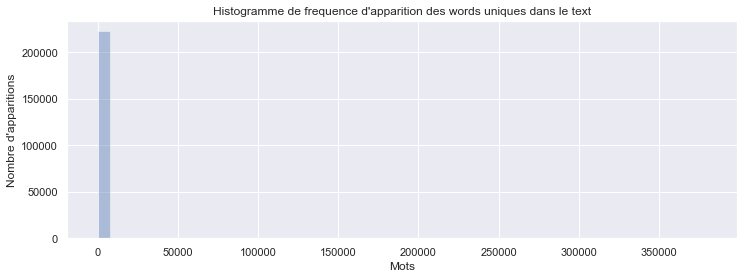

In [68]:
sns.set()
plt.figure(figsize=(12,4))
sns.distplot(df_count, kde=False)
plt.title("Histogramme de frequence d'apparition des words uniques dans le text")
plt.xlabel("Mots")
plt.ylabel("Nombre d'apparitions")
plt.show()

In [69]:
count[np.where(count > 1000)]

array([379880, 309057, 289823, 283303, 268225, 221654, 210320, 210044,
       207550, 136901, 131704, 119354, 115734, 105217, 101969, 100823,
        99740,  91446,  90986,  89389,  88072,  80334,  77259,  69179,
        61095,  54593,  52121,  52094,  45484,  45042,  44503,  43263,
        43155,  42859,  42183,  42148,  38687,  37738,  36796,  36524,
        35273,  35232,  34244,  34053,  32523,  32245,  32167,  31235,
        31160,  31125,  30856,  30729,  29567,  28724,  27676,  27307,
        26420,  25854,  25053,  24610,  23877,  22944,  22272,  22208,
        22202,  22105,  21644,  21503,  21227,  20898,  20678,  20510,
        20328,  18505,  18337,  18223,  17987,  17630,  17455,  17007,
        16776,  16691,  16602,  16388,  16370,  16259,  16201,  15854,
        15776,  15156,  15103,  15069,  14821,  14781,  14730,  14684,
        14469,  14461,  14268,  14147,  14110,  14105,  14073,  14034,
        13824,  13820,  13638,  13546,  13321,  13295,  13261,  13052,
      

In [70]:
len(np.where(count > 1000)[0])

937

In [71]:
max(count)

379880

In [72]:
unique[np.argmax(count)]

'the'

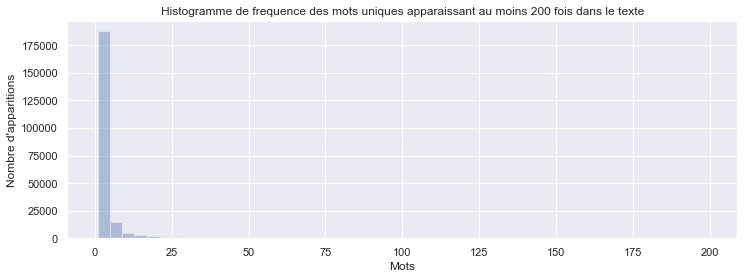

In [73]:
sns.set()
plt.figure(figsize=(12,4))
sns.distplot(count[np.where(count < 200)], kde=False)
plt.title("Histogramme de frequence des mots uniques apparaissant au moins 200 fois dans le texte")
plt.xlabel("Mots")
plt.ylabel("Nombre d'apparitions")
plt.show()

In [74]:
len(np.where(count == 1)[0])

124818

In [75]:
body_words_to_del = unique[np.where(count == 1)]
body_words_to_del

Index(['-l/users/adriangrigore/wxwidgets-manual/wxmac-2', 'month-',
       'sum_simplevalues_calculated', 'jar/library', 'net-3', 'bgworkers',
       'already-open', '=temp', 'sumpricetraditional', 'table2navcontroller',
       ...
       'rendermembersgadget', 'is_oneliner', 'databaselayer/welcome/welcome',
       'line/column', 'excecuting', 'd31-d24', 'final/best', ''/lib', '=bn',
       'sao'],
      dtype='object', length=124818)

In [76]:
del full_body_text_splitted
del count
del unique
del df_count

## Nettoyage et normalisation des données

### "Traning set" et "testing set"

In [77]:
xtrain, xtest = train_test_split(df_main, random_state=0)

df_test = df_main.loc[xtest.index]
df_test = df_test.reset_index()
df_test = df_test.drop("index", axis=1)

df_train = df_main.loc[xtrain.index]
df_train = df_train.reset_index()
df_train = df_train.drop("index", axis=1)

Nous allons essayer différentes méthodes de nettoyage pour obtenir un "bag of words".

- "Classic bag of words"(suppression des points, /n, html, minuscules, lematize):
    1.Aucune suppression des mots.
    2.Suppression des mots utilisés une seule fois.
    3.À partie des mots utilisés une seule fois, suppression de ceux qui ne sont pas dans le dictionnaire (trop bizarres comme mots).
    4.À partir des mots utilisés une seule fois, suppression des caractères spéciaux (*, +, -, ', #, nombres ... )
    
- "bag of words" avec suppression des "stopwords"(avec suppression des points, /n, html, minuscules, lematize), plus:
    1.Aucune suppression de mots
    2.Suppression des mots utilisés une seule fois
    3.À partir des mots utilisés une seule fois, suppression de ceux qui ne sont pas dans le dictionnaire (les mots bizarres)
    4.À partir des mots utilisés une seule fois, suppression des caractères spéciaux (*, +, -, ', #, nombres ...)
    
- "bag of words" TF-IDF(avec suppression des points, /n, html, minuscules, lematize), plus:
    1.Ne supprimez aucun mot
    2.Suppression des mots utilisés une seule fois
    3.À partir des mots utilisés une seule fois, suppression de ceux qui ne sont pas dans le dictionnaire (trop étranges)
    4.À partir des mots utilisés une seule fois, suppression des caractères spéciaux (*, +, -, ', #, nombres ... attachés aux mots)

### Classic Bag of word

#### 1. Aucune suppression de mots

Avec la focntion copy() nous ferrons du cleaning facilement

In [154]:
# Prendre le corpus dans les array.
text_train = df_train["Body_soup"].values.copy()
text_test = df_test["Body_soup"].values.copy()

In [155]:
debug = False

In [156]:
if debug:
    text_train = text_train[0:160]
    text_test = text_test[0:40]

In [157]:
# Création du transformeur
vectorizer = CountVectorizer(dtype=np.uint8)
# Tokenize build vocab
vectorizer.fit(text_train)
# Encodage du document
vector = vectorizer.transform(text_train)

In [158]:
dict(list(vectorizer.vocabulary_.items())[0:10])

{'would': 126000,
 'like': 68471,
 'to': 115885,
 'know': 66595,
 'how': 57484,
 'much': 76091,
 'disk': 38995,
 'space': 106697,
 'directory': 38760,
 'be': 21118}

Vérification de la mémoire du "bag of words"

In [159]:
nrows = len(text_train)
ncols = len(list(vectorizer.vocabulary_.items()))
print("Le 'bag of words' devrait avoir une taille de ({} * {}) en int8.".format(nrows, ncols))
print("La taille totale en mémoire sera de {} Go.".format(round(nrows * ncols * 8 / 1000000000)))

Le 'bag of words' devrait avoir une taille de (55456 * 128782) en int8.
La taille totale en mémoire sera de 57 Go.


Nous allons reduire notre échantillons à 15.000 pour notre traitement.

In [160]:
# Prendre le corpus dans les array.
text_train = df_train.loc[0:int(15000 * 0.8), "Body_soup"].values.copy()
text_test = df_test.loc[0:int(15000 * 0.2), "Body_soup"].values.copy()
if debug:
    text_train = text_train[0:160]
    text_test = text_test[0:40]
    
# Création du transformeur
vectorizer = CountVectorizer(dtype=np.uint8)
# Tokenize build vocab
vectorizer.fit(text_train)
# Encodage du document
vector = vectorizer.transform(text_train)

nrows = len(text_train)
ncols = len(list(vectorizer.vocabulary_.items()))
print("Le tarining 'bag of words' devrait avoir une taille de{} * {} in int8".format(nrows, ncols))
print("Ça taille totale en mémoire sera de {}Go".format(round(nrows * ncols * 1 / 1000000000, 2)))

Le tarining 'bag of words' devrait avoir une taille de12001 * 44410 in int8
Ça taille totale en mémoire sera de 0.53Go


Créons un "bag of words" dans lequel le nombre de lignes est égale au nombre de post, et le nombre de colonnes est égale au nombre total de mots uniques. La cellule sera le nombre d'occurrences de chaque mot.

In [161]:
reverse_dict = {}
for word, number in vectorizer.vocabulary_.items():
    reverse_dict[number] = word
    
bag_train = pd.DataFrame()
bag_train = bag_train.append(pd.DataFrame(vector.toarray()))
bag_train = bag_train.rename(columns=reverse_dict)

Pour la création du "bag of words" nous n'utiliserons que le "training set". Ceci dit, nous utilisons la méthode de la transformation vectorielle avec "testing set" et le vecteur fité sur le "training set". les mots présents dans le "testing set" serons supprimons. 

In [162]:
# Encode document
vector_test = vectorizer.transform(text_test)
# Création du "bag of words"
bag_test = pd.DataFrame()
bag_test = bag_test.append(pd.DataFrame(vector_test.toarray()))
bag_test = bag_test.rename(columns=reverse_dict)

In [165]:
bag_train.loc[0:5]

,00,000,0000,00000,000000,00000000,0000000000000000000000000,000000000000000e,000000000000054390,000000000000484240fa063de5d0b744adbed63a81faea390000c8428640a43d5005bd44,...,計算機,高性能のマックは早い,ａｄｉはｃｐｔへ売却打診中とのこと,ﾀﾀ,ﾁﾒ,ﾔﾻ,ﾙﾺ,ﾝﾉ,ﾨﾈ,ﾱﾱ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
bag_test.loc[0:5]

,00,000,0000,00000,000000,0000000,00000000,000000000,0000000000,000000000000,...,鷠3,오후,ａｄｉはｃｐｔへ売却打診中とのこと,ﾀﾀ,ﾁﾒ,ﾔﾻ,ﾙﾺ,ﾝﾉ,ﾨﾈ,ﾱﾱ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
print("Le 'bag of words' entier a un nombre total de {} mots".format(bag_train.shape[1]))

Le 'bag of words' entier a un nombre total de 44410 mots


Sauvegarde du "bag of words"

In [167]:
bag_train["Id"] = df_train["Id"]
bag_train["Tags"] = df_train["Tags"]
bag_train["Train"] = 1

bag_test["Id"] = df_test["Id"]
bag_test["Tags"] = df_test["Tags"]
bag_test["Train"] = 0

bag_train = bag_train.append(bag_test)

In [168]:
print("La taille en mémoire du 'bag of words' totale est de {} Go"
      .format(round(bag_train.memory_usage(index=False).sum() / 1000000000, 2)))

La taille en mémoire du 'bag of words' totale est de 0.67 Go


In [169]:
bag_train.to_hdf("output/classic_bag1.h5", index='False', key='stage', mode='w')

/Users/boleynkenkem/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Id', 'Tags'], dtype='object')]

  encoding=encoding,


In [170]:
del bag_train
del bag_test
del vector
del vectorizer
del reverse_dict

#### 2. Suppression des mots utilisés une seule fois.

In [ ]:
Duplication des 'feature'

In [171]:
def get_train_test(nb_rows=0):
    """ Prend en entrée les valeurs test et train en fonction des
    valeurs de debug """
    
    if nb_rows == 0:
        text_train = df_train["Body_soup"].values.copy()
        text_test = df_test["Body_soup"].values.copy()
    else:
        text_train = df_train.loc[0:int(nb_rows * 0.8), "Body_soup"].values.copy()
        text_test = df_test.loc[0:int(nb_rows * 0.2), "Body_soup"].values.copy()        
    
    if debug:
        text_train = text_train[0:16]
        text_test = text_test[0:4]
    
    return text_train, text_test

In [172]:
text_train, text_test = get_train_test(nb_rows = 15000)

Cleaning feature

In [173]:
def remove_unique_text(text, pd_words_to_del):
    """ À partir d'un texte et une liste de mots à supprimer, 
    retourne un texte cleaned sans ces mots. """
    
    tokens = word_tokenize(text)
    pd_tokens = pd.DataFrame({"words":tokens})
    pd_tokens = pd_tokens.loc[~pd_tokens["words"].isin(pd_words_to_del["words"].values)]
    
    return ' '.join(pd_tokens["words"].values)

In [174]:
def remove_unique_series(texts, pd_words_to_del, function, cores=1):
    """ 
    À partir d'une serie de textes et de mots à supprimer, retourne une serie sans 
    ces mots. 
    """
    
    if cores == 1:
        new_texts = []
        for i, text in enumerate(texts):
            new_text = remove_unique_text(text, pd_words_to_del)
            new_texts.append(new_text)
    
    else:
        inputs = tqdm(texts)
        new_texts = Parallel(n_jobs=cores)(delayed(function)(body, pd_words_to_del) for body in inputs)
    
    return new_texts

In [175]:
pd_body_words_to_del = pd.DataFrame({"words":body_words_to_del})

In [176]:
text_train = remove_unique_series(text_train, pd_body_words_to_del, remove_unique_text, 1)
text_test = remove_unique_series(text_test, pd_body_words_to_del, remove_unique_text, 1)

Construction du "bag of words"

In [177]:
def create_bag(text_train, text_test):
    """ Prend deux series de textes, train et test, et retourne
    un 'bag of words'
    """
    
    # Créate du transformeur
    vectorizer = CountVectorizer(dtype=np.uint8)
    # Tokenize, build vocab
    vectorizer.fit(text_train)
    # Encodage document
    vector = vectorizer.transform(text_train)
    
    reverse_dict = {}
    for word, number in vectorizer.vocabulary_.items():
        reverse_dict[number] = word

    bag_train = pd.DataFrame()
    bag_train = bag_train.append(pd.DataFrame(vector.toarray()))
    bag_train = bag_train.rename(columns=reverse_dict)
    
    # Encodage test document
    vector_test = vectorizer.transform(text_test)
    # Création du 'bag of words'
    bag_test = pd.DataFrame()
    bag_test = bag_test.append(pd.DataFrame(vector_test.toarray()))
    bag_test = bag_test.rename(columns=reverse_dict)
    
    return bag_train, bag_test

In [178]:
bag_train, bag_test = create_bag(text_train, text_test)

In [179]:
print("La taille totale en mémoire du 'train bag' est {} Go"
      .format(round(bag_train.memory_usage(index=False).sum() / 1000000000, 2)))
print("La taille totale en mémoire du 'test bag' est {} Go"
      .format(round(bag_test.memory_usage(index=False).sum() / 1000000000, 2)))

La taille totale en mémoire du 'train bag' est 0.37 Go
La taille totale en mémoire du 'test bag' est 0.09 Go


In [180]:
def save_bags(bag_train, bag_test, method, number):
    """ Sauvegarde des bags avec les noms suivants 'output/<method>_bag<number>.csv' """
    
    bag_train["Id"] = df_train["Id"]
    bag_train["Tags"] = df_train["Tags"]
    bag_train["Train"] = 1

    bag_test["Id"] = df_test["Id"]
    bag_test["Tags"] = df_test["Tags"]
    bag_test["Train"] = 0

    bag_train = bag_train.append(bag_test)
    print("Le 'bag' entier a un nombre total de {} mots".format(bag_train.shape[1]))
    bag_train.to_hdf("output/" + method + "_bag" + number + ".h5", index='False', key='stage', mode='w')

In [181]:
save_bags(bag_train, bag_test, "classic", "2")
del bag_train
del bag_test

Le 'bag' entier a un nombre total de 30579 mots


#### 3. À partie des mots utilisés une seule fois, suppression de ceux qui ne sont pas dans le dictionnaire.

Duplication des 'features'

In [229]:
text_train, text_test = get_train_test(nb_rows = 15000)

Nettoyage des 'features'

In [230]:
text_train[0]

"i would like to know how much disk space a directory be go to consume before i bring it over from the perforce server i do n't see any way to do this other than get the file and look at the size of the directory in a file manager this , of course , defeat the purpose be there a way to get file size info from perforce without actually get the file ?"

Suppression des mots étranges, mots présents dans le dictionnaire, de notre fichier.  

In [231]:
pd_words_to_del2 = pd.DataFrame({"words":body_words_to_del})
pd_words_to_del2 = pd_words_to_del2.loc[~pd_words_to_del2["words"].isin(words.words()).values]

In [232]:
print("Taille de l'ancien fichier supprimé: {}".format(len(pd_body_words_to_del)))
print("Taille du nouveau fichier supprimé: {}".format(len(pd_words_to_del2)))

Taille de l'ancien fichier supprimé: 124818
Taille du nouveau fichier supprimé: 121678


In [233]:
text_train[1]

"my asp net applications work fine everyday until last month , my web start to get 2-3 time of problem with sqlsession state server as follow : blockquote system web httpexception exception of type 'system web httpexception ' be throw at system web httpasyncresult end ( ) at system web sessionstate sessionstatemodule endacquirestate ( iasyncresult ar ) at system web httpapplication asynceventexecutionstep onasynceventcompletion ( iasyncresult ar ) ================================================== exception : system web httpexception unable to connect to sql server session database at system web sessionstate sqlsessionstatestore throwsqlconnectionexception ( sqlconnection conn , exception e ) at system web sessionstate sqlsessionstatestore sqlstateconnection ctor ( sqlpartitioninfo sqlpartitioninfo ) at system web sessionstate sqlsessionstatestore getconnection ( string id , boolean & usepooling ) at system web sessionstate sqlsessionstatestore doget ( httpcontext context , string id ,

In [234]:
text_train = remove_unique_series(text_train, pd_words_to_del2, remove_unique_text, 1)
text_test = remove_unique_series(text_test, pd_words_to_del2, remove_unique_text, 1)

In [235]:
text_train[0]

"i would like to know how much disk space a directory be go to consume before i bring it over from the perforce server i do n't see any way to do this other than get the file and look at the size of the directory in a file manager this , of course , defeat the purpose be there a way to get file size info from perforce without actually get the file ?"

Sauvegarde des 'bags of words'

In [236]:
bag_train, bag_test = create_bag(text_train, text_test)

Sauvegarde des 'bags'

In [237]:
save_bags(bag_train, bag_test, "classic", "3")
del bag_train
del bag_test

Le 'bag' entier a un nombre total de 31076 mots


#### 4. À partir des mots utilisés une seule fois, suppression des caractères spéciaux.

Duplication des 'features'

In [238]:
text_train, text_test = get_train_test(nb_rows = 15000)

Nettoyage des 'features' 

In [239]:
def remove_unique_without_spe_text(text, words_to_del):
    """ À partir d'un texte et des mots à supprimés, 
        retourne un sans carcatères spéciaux. """
    

    # Suppression des ponctuations
    expr = ["?", ",", ".", "'", ";", ":", "!", 
            "(", ")", "{", "}", "[", "]",
            "|", "_", "`", "'", "#", "&", "$",
            "+", "-", "*", "/", "=", "<", ">",
            "0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
    for char in expr:
        text = text.replace(char, ' ') 
    
    return text

In [247]:
text_train[0]

"i would like to know how much disk space a directory be go to consume before i bring it over from the perforce server i do n't see any way to do this other than get the file and look at the size of the directory in a file manager this , of course , defeat the purpose be there a way to get file size info from perforce without actually get the file ?"

In [242]:
text_train = remove_unique_series(text_train, np.nan, remove_unique_without_spe_text, 1)
text_test = remove_unique_series(text_test, np.nan, remove_unique_without_spe_text, 1)

In [246]:
text_train[0]

"i would like to know how much disk space a directory be go to consume before i bring it over from the perforce server i do n't see any way to do this other than get the file and look at the size of the directory in a file manager this , of course , defeat the purpose be there a way to get file size info from perforce without actually get the file ?"

Création des 'bags'

In [248]:
bag_train, bag_test = create_bag(text_train, text_test)

Sauvegarde des 'bags'

In [249]:
save_bags(bag_train, bag_test, "classic", "4")
del bag_train
del bag_test

Le 'bag' entier a un nombre total de 44413 mots


### 'Bag of words' Suppression des 'stopwords' - Frequence

In [250]:
def remove_stopwords(df_bag):
    """ À partir du 'bag of words' suppression des 
          'stopwords' """
    
    # Suppression des colonnes sans mots
    cols = np.array(df_bag.columns)
    cols = np.delete(cols, np.where(~np.isin(cols, ["Id", "Tags", 'Train'], invert=True)))
    
    # Suppression des colonnes qui sont les 'stopwords'
    col_to_del = []
    for col in cols:
        if col in stopwords.words():
            col_to_del.append(col)
            
    df_bag.drop(col_to_del, axis=1, inplace=True)
    
    return df_bag

#### 1. Aucune suppression de mots

Changement du 'bag of words'

In [251]:
df_bag = pd.read_hdf("output/classic_bag1.h5", index='False', key='stage', mode='r')

Suppression des colonnes de mots communs

In [252]:
print("Le 'bag' entier avait un nombre de {} mots".format(df_bag.shape[1]))
df_bag = remove_stopwords(df_bag)
print("Le 'bag' entier a maintenant un nombre total de {} mots".format(df_bag.shape[1]))

Le 'bag' entier avait un nombre de 44413 mots
Le 'bag' entier a maintenant un nombre total de 44026 mots


Sauvegarde du 'bag'

In [ ]:
df_bag.to_hdf("output/stopwords_bag" + "1" + ".h5", index='False', key='stage', mode='w')

#### 2. Suppression des mots utilisés une seule fois.

In [253]:
df_bag = pd.read_hdf("output/classic_bag" + "2" + ".h5", index='False', key='stage', mode='r')
print("Le 'bag' entier avait un nombre de {} mots".format(df_bag.shape[1]))
df_bag = remove_stopwords(df_bag)
print("Le 'bag' entier a maintenant un nombre total de {} mots".format(df_bag.shape[1]))
df_bag.to_hdf("output/stopwords_bag" + "2" + ".hd5", index='False', key='stage', mode='w')

Le 'bag' entier avait un nombre de 30579 mots
Le 'bag' entier a maintenant un nombre total de 30223 mots


/Users/boleynkenkem/opt/anaconda3/lib/python3.7/site-packages/pandas/io/pytables.py:270: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->axis0] [items->None]

  f(store)
/Users/boleynkenkem/opt/anaconda3/lib/python3.7/site-packages/pandas/io/pytables.py:270: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_items] [items->None]

  f(store)


#### 3. À partie des mots utilisés une seule fois, suppression de ceux qui ne sont pas dans le dictionnaire.

In [254]:
df_bag = pd.read_hdf("output/classic_bag" + "3" + ".h5", index='False', key='stage', mode='r')
print("Le 'bag' entier avait un nombre de {} mots".format(df_bag.shape[1]))
df_bag = remove_stopwords(df_bag)
print("Le 'bag' entier a maintenant un nombre total de {} mots".format(df_bag.shape[1]))
df_bag.to_hdf("output/stopwords_bag" + "3" + ".h5", index='False', key='stage', mode='w')

Le 'bag' entier avait un nombre de 31076 mots
Le 'bag' entier a maintenant un nombre total de 30717 mots


#### 4. À partir des mots utilisés une seule fois, suppression des caractères spéciaux.

In [255]:
df_bag = pd.read_hdf("output/classic_bag" + "4" + ".h5", index='False', key='stage', mode='r')
print("Le 'bag' entier avait un nombre de {} mots".format(df_bag.shape[1]))
df_bag = remove_stopwords(df_bag)
print("Le 'bag' entier a maintenant un nombre total de {} mots".format(df_bag.shape[1]))
df_bag.to_hdf("output/stopwords_bag" + "4" + ".h5", index='False', key='stage', mode='w')

Le 'bag' entier avait un nombre de 44413 mots
Le 'bag' entier a maintenant un nombre total de 44026 mots


### 'Bag of words' avec  TF-IDF

Pour la deuxième méthode, nous utiliserons la méthode  le terme 'tf-idf'(frequency–inverse document frequency). Au lieu de supprimer les mots courants, on calculera la fréquence d'apparition des mots dans l'ensemble dans nos tableaux de descriptions. Les mots qui se resemblent souvent auront moins de poids. En Outre, la combinaison de mots habituellement communs dans une expression nominale par exemple serons allégés. Comme ça, quelques mots communs dans deux descriptions ne compteront pas comme deux mots similaires, mais plus vraisemblables.

#### 1. Aucune suppression de mots

In [256]:
df_bag = pd.read_hdf("output/classic_bag" + "1" + ".h5", index='False', key='stage', mode='r')
print("Le bag entier a un nombre total de {} mots".format(df_bag.shape[1]))

# Séparation des 'bags'
df_bag_train = df_bag.loc[df_bag["Train"] == 1]
df_bag_test = df_bag.loc[df_bag["Train"] == 0]

Le bag entier a un nombre total de 44413 mots


In [277]:
def reverse_bag(df_bag):
    """ À partir du 'bag' création d'une liste de textes"""
    
    # Récupération des colonnes
    cols = np.array(df_bag.columns)
    cols = np.delete(cols, np.where(~np.isin(cols, ["Id", "Tags", 'Train'], invert=True)))
    
    # Définition des colonnes comme texte unique
    for i, col in enumerate(cols):
        cols[i] = str(col)
    cols_text = [" ".join(cols)]
        
    # Création du 'bag of word' et initialisation vectorielle
    vec = CountVectorizer()
    vec.fit(cols_text)
    
    # Vocabulaire inverse 
    terms = np.array(list(vec.vocabulary_.keys()))
    indices = np.array(list(vec.vocabulary_.values()))
    inverse_vocabulary = terms[np.argsort(indices)]

    texts = []
    for row in range(len(df_bag)):
        # Récupération de la première ligne du 'bag of word'
        inputs = df_bag.loc[row,cols]#.values

        # Change de la ligne dans le texte
        text = []
        for i, freq in enumerate(inputs):
            if freq > 0:
                text.append((inverse_vocabulary[i] + " ") * int(freq))
        texts.append(' '.join(text))
        
    return texts

In [ ]:
train_texts = reverse_bag(df_bag_train)
test_texts = reverse_bag(df_bag_test)